# Credit Card Users Churn Prediction

- Author: James Somerville
- Date: March 1, 2024
- Note: Used GitHub Copilot for generative code assist. Prompts are shown in comments.

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Library Import

In [75]:
# install imblearn
!pip install imblearn

# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

## Data Loading

In [76]:
df = pd.read_csv("BankChurners.csv")
data = df.copy()

## Data Overview

- Observations
- Sanity checks

In [77]:
data.shape

(10127, 21)

There are over 10,000 rows and 21 columns.

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- Clientnum is the unique identifier and will be ignored for analysis
- The dependent variable, Attrition_Flag is a categorical object (string) variable
- Gender, education level, marital status, income, and card type are all categorical variables represented as strings
- The rest of the variables are continuous numerical
- Education and Marital Status have null values present.

In [79]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [80]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


- Several of the categorical variables are long-form text. These will need to be encoded as dummy variables.
- Education and Marital status are seen to have some null (NaN) values.

In [81]:
# let's check for duplicate rows in the data
data.duplicated().sum()

0

No duplicate rows exist in dataset.

In [82]:
# Checking for missing values in each column
data.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

There are 1519 empty values for Education and 749 for Marital Status. These will be treated below.

In [83]:
#Checking for the number of unique values in each column
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- The dependent variable, Attrition, has 2 unique values - which equates to yes or no if the account is closed.
- Categorical variables have 2-6 unique values, which seems appropriate.

In [84]:
# Drop CLIENTNUM from data as it is the unique identifier for the customers and does not provide any useful information
data.drop("CLIENTNUM", axis=1, inplace=True)

In [85]:
#view the statistical summary of the numerical columns in the data in table format
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.000,0.760,0.219,0.000,0.631,0.736,0.859,3.397


- The average age of customer relationship is 36 months. The max is 56 months.
- Average months inactive over last year is 2.3 with some active every month (0) up to 6 months of inactivity.
- Average utilization of the card is .275 with some maxing out the limit and some not using.
- In general, none of the statistics seem peculiar.

In [86]:
#Print the unique values for each categorical column of type object
for column in data.select_dtypes(include="object"):
    print(column, ":", data[column].unique(), "\n")

Attrition_Flag : ['Existing Customer' 'Attrited Customer'] 

Gender : ['M' 'F'] 

Education_Level : ['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate'] 

Marital_Status : ['Married' 'Single' nan 'Divorced'] 

Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'abc'] 

Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum'] 



- There are empty values in Education_Level, Marital_Status columns. These will need to be treated (i.e. imputed).
- Income_Category has a value of "abc" which seems like a typo. This will need to be treated.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?

### EDA Helper Functions

In [87]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [88]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [89]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [90]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

Customer_Age

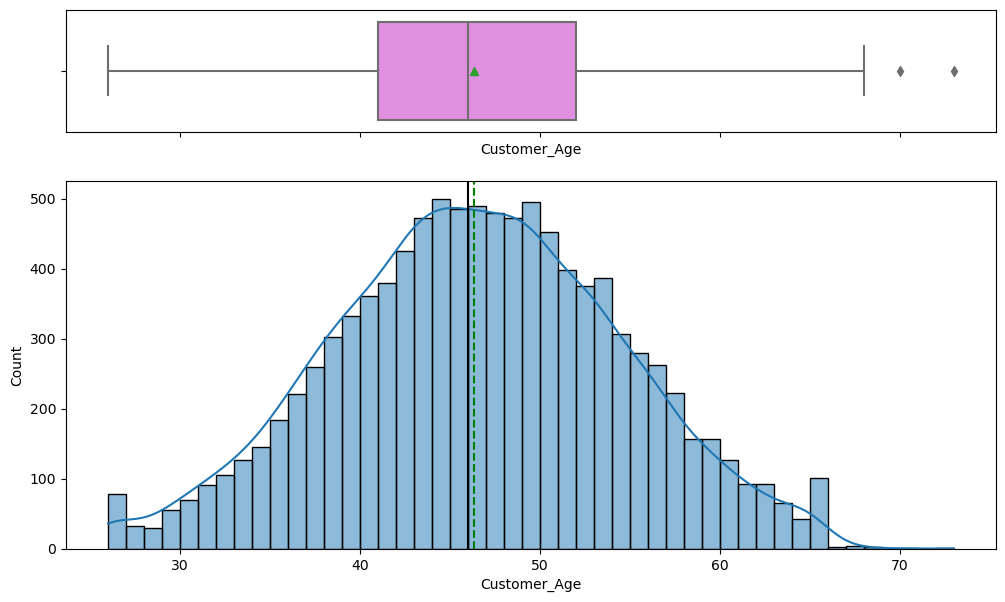

In [91]:
histogram_boxplot(data, "Customer_Age", kde=True)

- Age is normally distributed with only a couple of older outliers.

Months_on_book

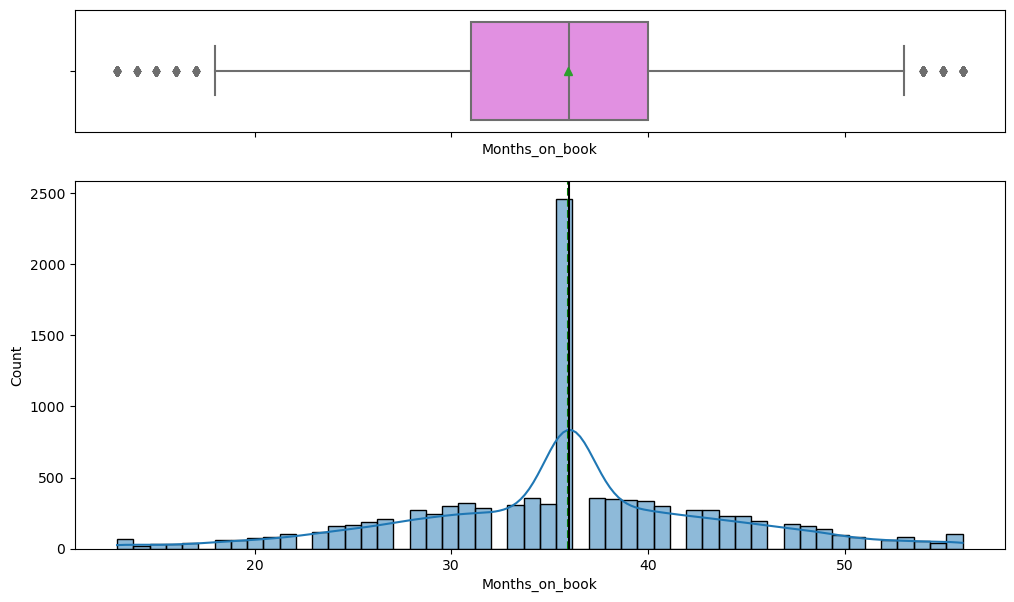

In [92]:
histogram_boxplot(data, "Months_on_book", kde=True)

- The months on book or customer relationship term has a relatively normal distribution - with the exception of a sharp spike over 2000 customers with a relationship for approximately 35 months. Perhaps this coincides with a marketing push 3 years prior that drew new customers.

Credit_Limit

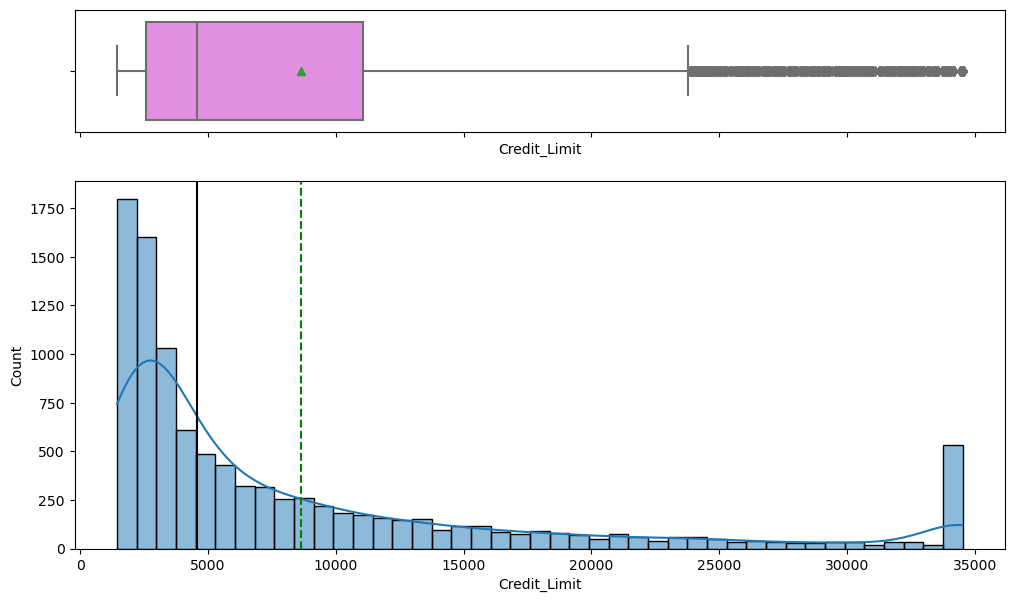

In [93]:
histogram_boxplot(data, "Credit_Limit", kde=True)

- Credit Limit is highly right skewed with 75% of customers having a credit limit under ~$12,000. However, there are many outliers above $25,000.

Total_Revolving_Bal

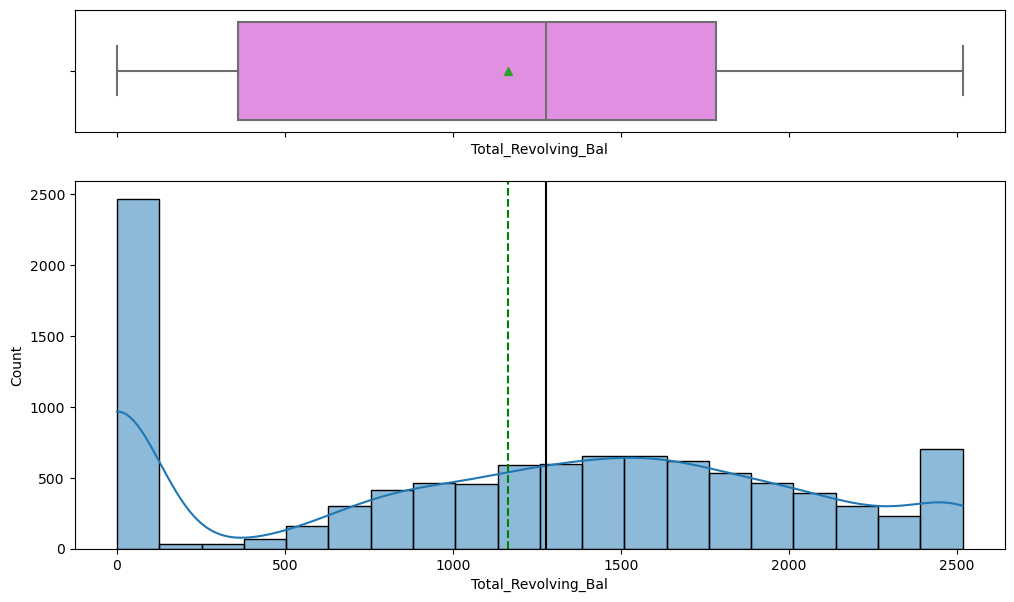

In [94]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)

- 50% of revolving balances lie between $400 and ~$1800 with a median of ~$1200. The distribution is multi-modal.

Avg_Open_To_Buy

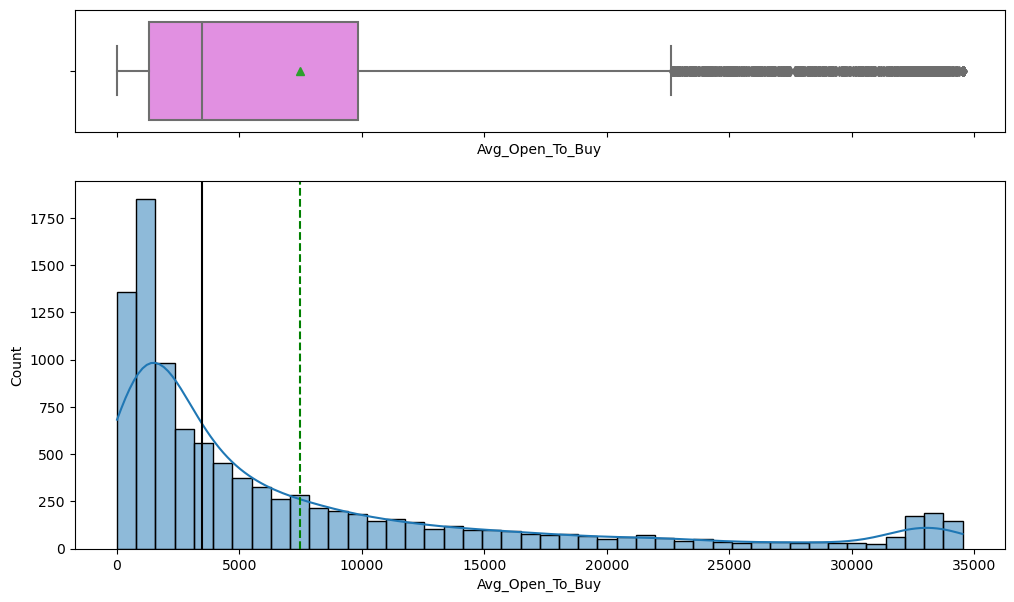

In [95]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)

- The open to buy or available balance is highly right-skewed with a median of ~$3500. There are many outliers bove $23000.

Total_Amt_Chng_Q4_Q1

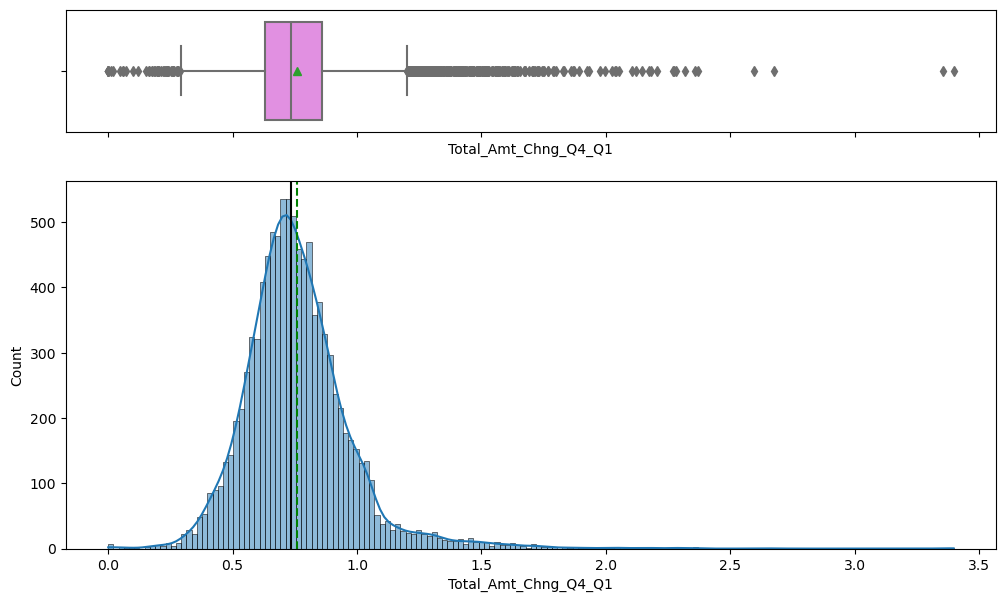

In [96]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)

Total_Trans_Amt

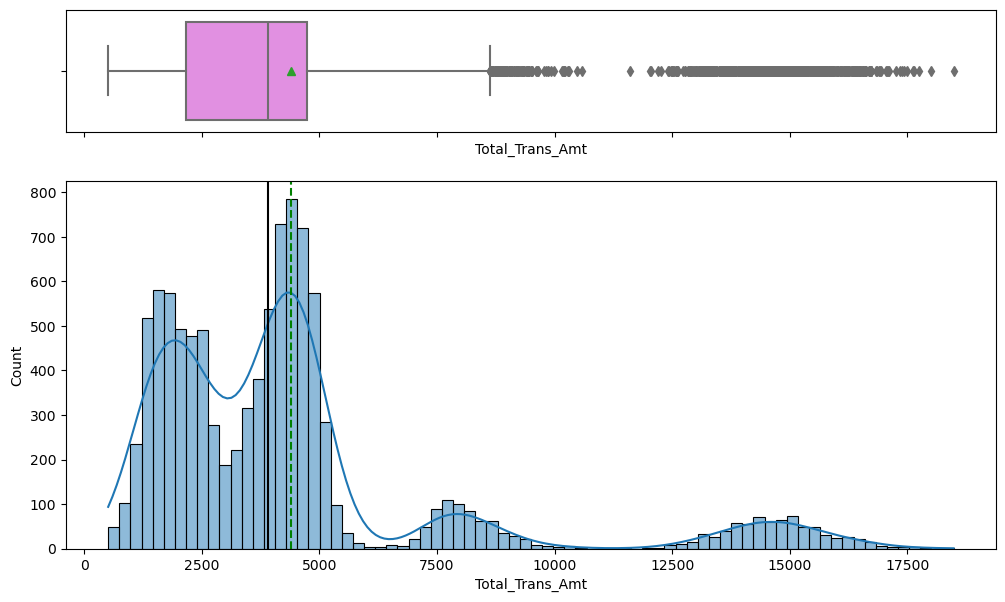

In [97]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)

1. How is the total transaction amount distributed?
   - Represents a multi-modal distribution with a general righ-skew.
   - 50% of customer total transaction amounts are between about $2300 and %5000.
   - there are many high outliers.

Total_Trans_Ct

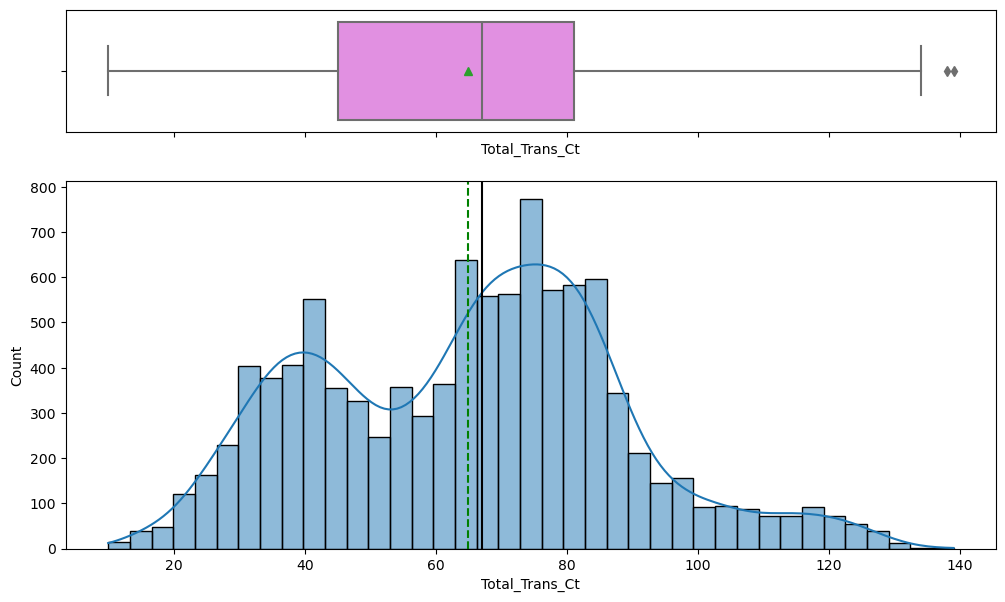

In [98]:
histogram_boxplot(data, "Total_Trans_Ct", kde=True)

Total_Ct_Chng_Q4_Q1

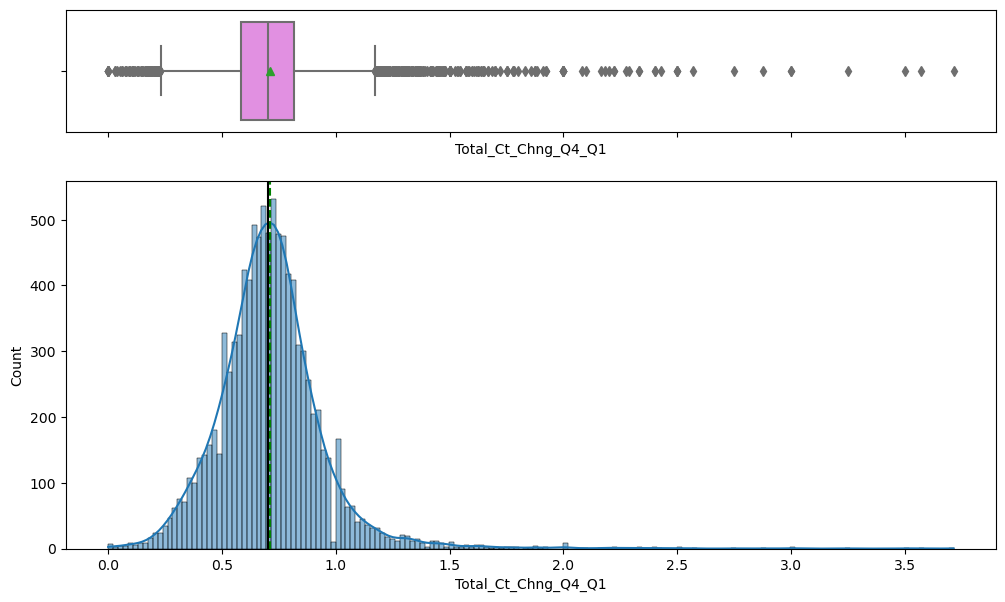

In [99]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)

Avg_Utilization_Ratio

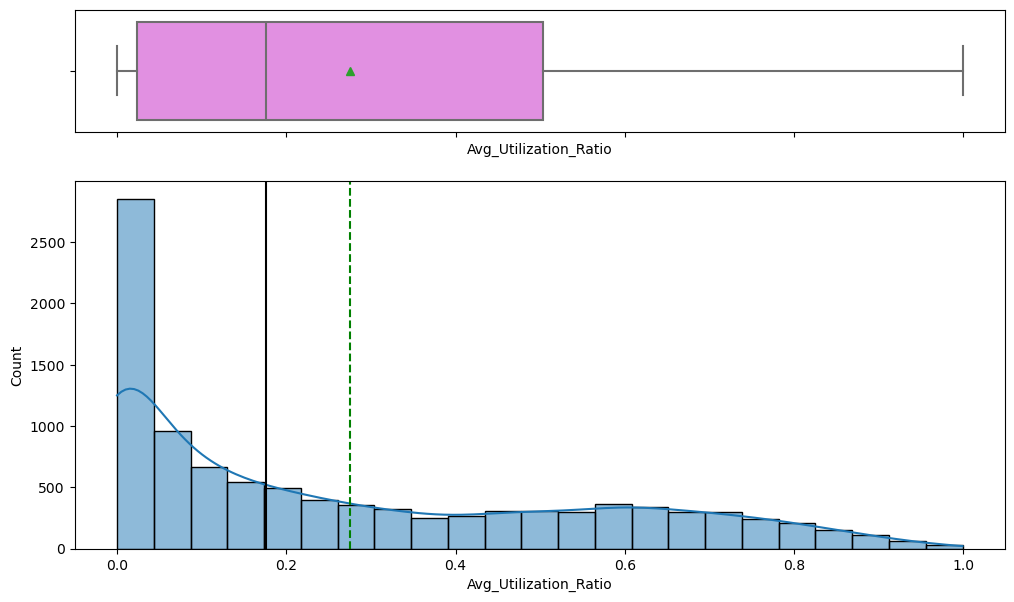

In [100]:
histogram_boxplot(data, "Avg_Utilization_Ratio", kde=True)

Gender

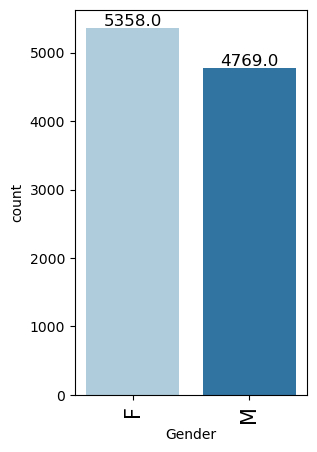

In [101]:
labeled_barplot(data, "Gender")

Dependent_count

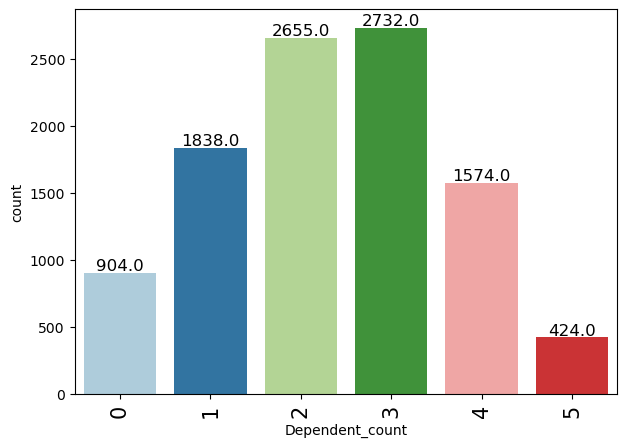

In [102]:
labeled_barplot(data, "Dependent_count")

Education_Level

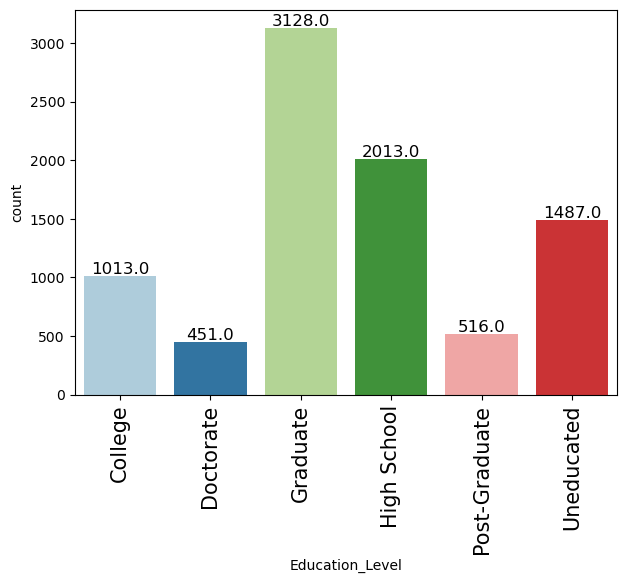

In [103]:
labeled_barplot(data, "Education_Level")

2. What is the distribution of the level of education of customers?
   - Graduate education is most common, followed by High School
   - Doctorate education is the least common.

Marital_Status

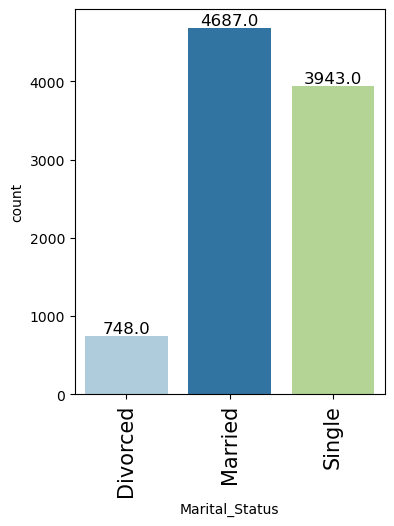

In [104]:
labeled_barplot(data, "Marital_Status")

Income_Category

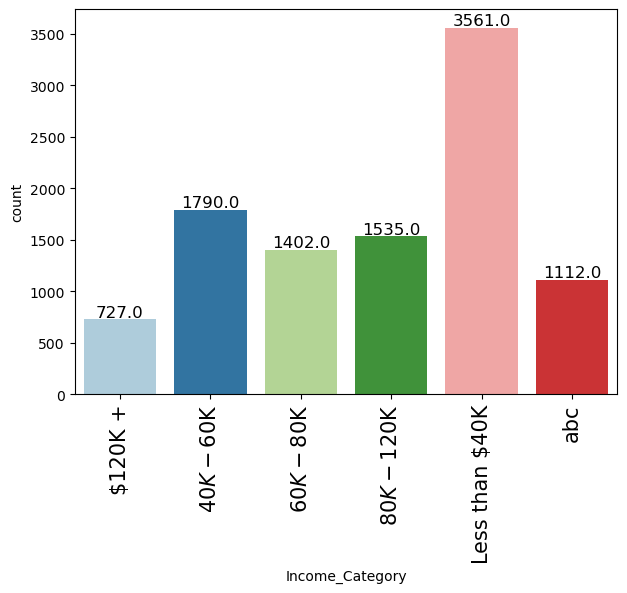

In [105]:
labeled_barplot(data, "Income_Category")

3. What is the distribution of the level of income of customers?
   - The largest number of customers earn less than $40,000.

   - The fewest earn more than $120,000.

Card_Category

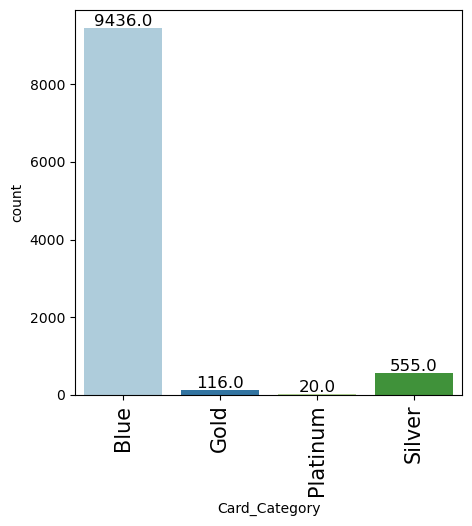

In [106]:
labeled_barplot(data, "Card_Category")

Total_Relationship_Count

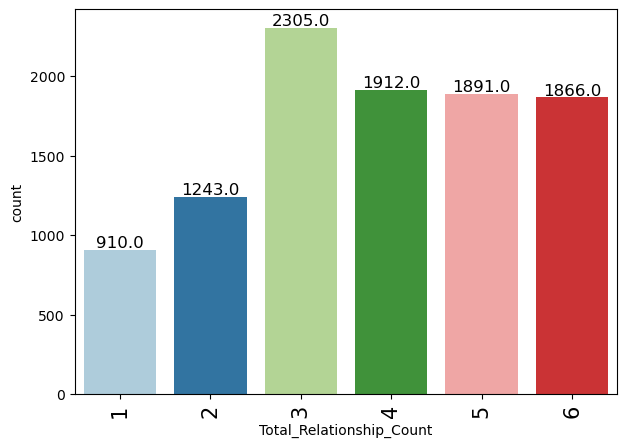

In [107]:
labeled_barplot(data, "Total_Relationship_Count")

Months_Inactive_12_mon

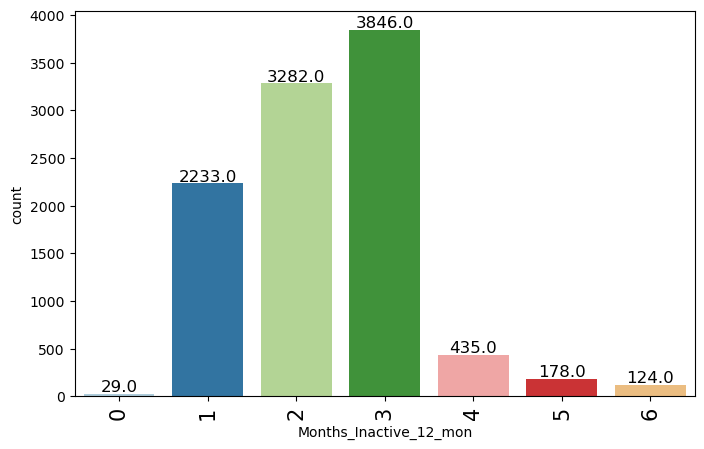

In [108]:
labeled_barplot(data, "Months_Inactive_12_mon")

Contacts_Count_12_mon

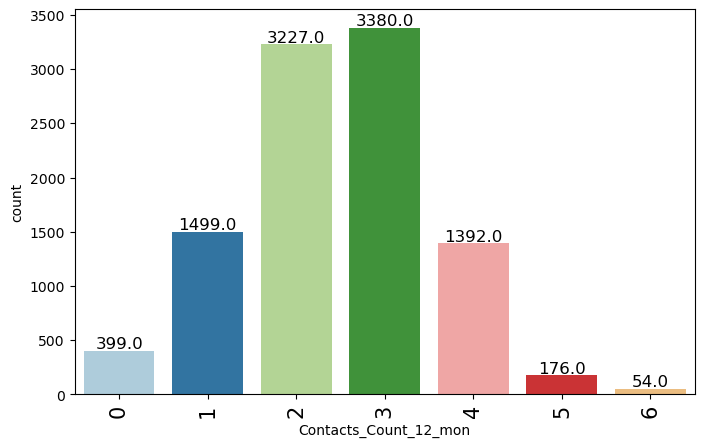

In [109]:
labeled_barplot(data, "Contacts_Count_12_mon")

Attrition_Flag

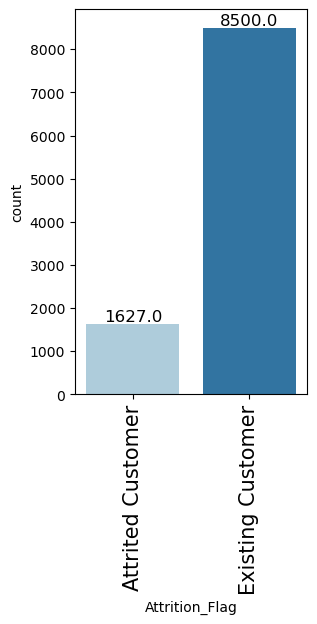

In [110]:
labeled_barplot(data, "Attrition_Flag")

### Bivariate Analysis

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

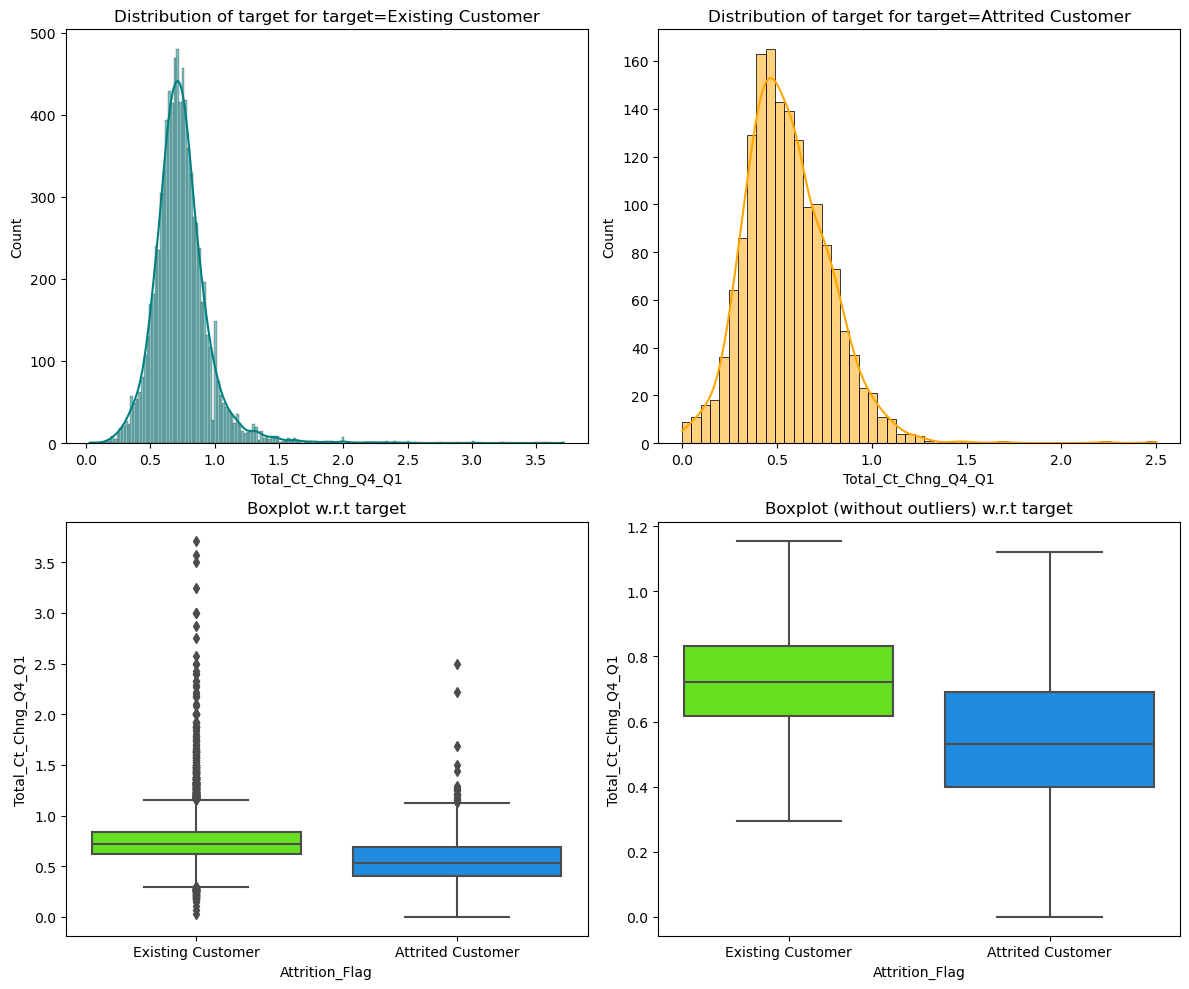

In [111]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

- The change in transactions counts for attrited and existing customers actually follow similar bell-shaped curves that are right-skewed, according to the histogram.
- Overall, for existing customers, the median count change was about 0.2 higher than for attrited customers.
- There were more outliers with high transaction count changes for existing customers.

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


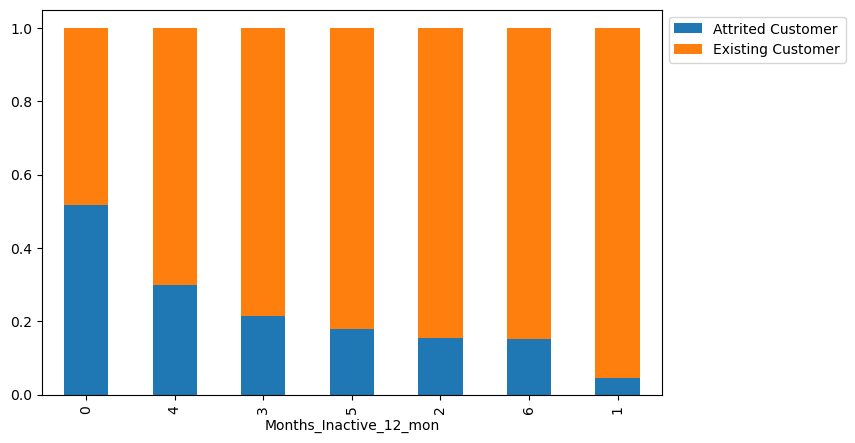

In [112]:
stacked_barplot(data,"Months_Inactive_12_mon", "Attrition_Flag")

- Surprisingly customers with no inactive months are also the most highly attrited, whereas those with 1 inactive month are highly still existing customers.
- There does not seem to be a relationship between inactivity and attrition.


6. What are the attributes that have a strong correlation with each other?

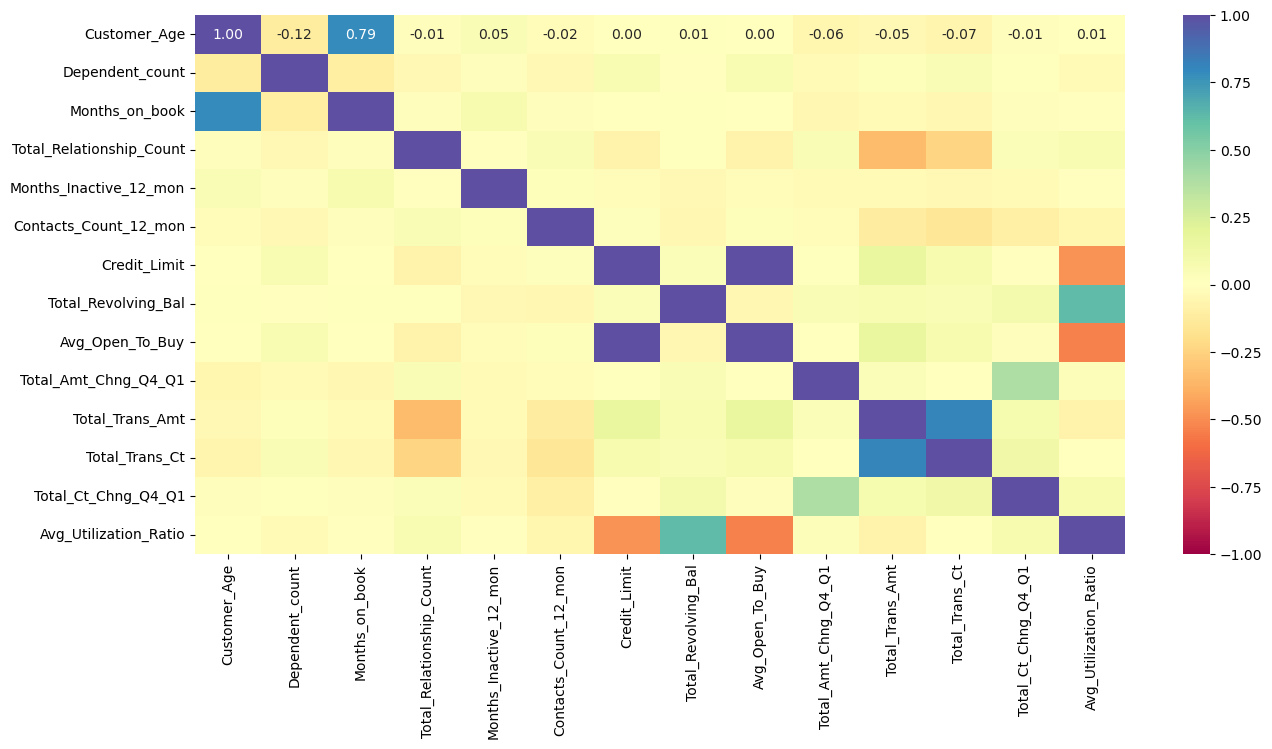

In [113]:
# Create a heatmap to check for correlation
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Months on Book and Customer Age are highly correlated.
- Average Open to Buy and Credit Limit have a very high correlation. This makes sense as a higher limit is less likely to be fully utilized.
- Total Transaction Count and Total Transaction Amounts are highly correlated. This is understandable as more quantity of transactions would contribute to higher total amounts.
- Average Open to Buy and Average Utilization Ratio are highly negatively correlated. These are inversely related as a higher amount of unspent credit would lead to less utilization.
- Credit Limit and Average Utilization Ratio are also highly negatively correlated for a similar reason as above.

## Data Pre-processing

Drop the dependent variable from main dataset and store in separate variable.

In [114]:
X = data.drop(["Attrition_Flag"], axis=1)
y = data['Attrition_Flag'].apply(lambda x : 1 if x=='Existing Customer' else 0)

#check unique values in Y of the target variable
y.unique()

array([1, 0])

In [115]:
#In dataset X change values of "abc" in the "Income_Category" column to NaN
X["Income_Category"].replace("abc", np.nan, inplace=True)

#Check unique values in the "Income_Category" column
X["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', nan], dtype=object)

In [116]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


### Missing value imputation




In [117]:
# Let's impute the missing values for the columns with NaN values (which now includes Income_Category); perform separate imputation for train, validation and test data to avoid data leakage
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

# Check for missing values in the imputed columns
print(X_train[cols_to_impute].isna().sum())
print(X_val[cols_to_impute].isna().sum())
print(X_test[cols_to_impute].isna().sum())


Education_Level    0
Marital_Status     0
Income_Category    0
dtype: int64
Education_Level    0
Marital_Status     0
Income_Category    0
dtype: int64
Education_Level    0
Marital_Status     0
Income_Category    0
dtype: int64


In [118]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

# Check the shape of the data after creating dummy variables
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


In [119]:
# Show first few rows of the training data
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9501,47,2,37,1,2,2,21714.000,1969,19745.000,0.944,13270,104,0.625,0.091,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False
5065,49,4,42,5,1,4,7789.000,957,6832.000,0.724,3412,70,0.842,0.123,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False
2375,53,2,36,6,1,3,3176.000,1470,1706.000,0.388,1634,53,0.472,0.463,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
7579,56,2,45,3,3,1,3296.000,1435,1861.000,0.968,4327,66,0.737,0.435,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2776,47,4,36,3,3,3,17557.000,0,17557.000,0.667,2142,62,0.378,0.000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite - False Positive
- Predicting a customer will not attrite and the customer attrites - False Negative

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

### Model Building Helper Functions

In [120]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [121]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Code for model building with original data

In [122]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9976465973720338
Random forest: 1.0
GBM: 0.9921553245734458
Adaboost: 0.9825455971759168
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.9794117647058823
Random forest: 0.9847058823529412
GBM: 0.9888235294117647
Adaboost: 0.9823529411764705
Xgboost: 0.9888235294117647
dtree: 0.9629411764705882


Each model does very well with recall scores (minimizing false negatives) on the training and validation datasets. Xgboost and GBM do the best on validation by about 1%.

### Model Building with Oversampled data


In [123]:
# Show the shape of the y_train and the percentage of occurrences of each unique value
print(y_train.shape)
print(y_train.value_counts(normalize=True))

(6075,)
Attrition_Flag
1   0.839
0   0.161
Name: proportion, dtype: float64


Only 16% of customers in the original training dataset have attrited (0).

In [124]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [125]:
## Show the shape of the y_train_over and the percentage of occurrences of each unique value after oversampling
print(y_train_over.shape)
print(y_train_over.value_counts(normalize=True))

(10198,)
Attrition_Flag
1   0.500
0   0.500
Name: proportion, dtype: float64


After oversampling, there is a 50/50 mix of existing customers (1) and attrited customers and the total count of records has increased by ~4000.

In [126]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9954893116297313
Random forest: 1.0
GBM: 0.9752892724063542
Adaboost: 0.957834869582271
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.9570588235294117
Random forest: 0.9723529411764706
GBM: 0.9747058823529412
Adaboost: 0.9558823529411765
Xgboost: 0.9841176470588235
dtree: 0.9470588235294117


Oversampling actually reduces recall scores on validation data by ~0.4% to over 1%, thus a benefit is not seen from oversampling.

### Model Building with Undersampled data

In [127]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [128]:
## Show the shape of the y_train_over and the percentage of occurrences of each unique value after oversampling
print(y_train_un.shape)
print(y_train_un.value_counts(normalize=True))

(1952,)
Attrition_Flag
0   0.500
1   0.500
Name: proportion, dtype: float64


After undersampling the y training set is a 50/50 mix of attrited and existing customers. However, the total record count has decreased by ~4000 from original.

In [129]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9959016393442623
Random forest: 1.0
GBM: 0.9723360655737705
Adaboost: 0.9405737704918032
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.9241176470588235
Random forest: 0.9423529411764706
GBM: 0.9511764705882353
Adaboost: 0.9223529411764706
Xgboost: 0.9594117647058824
dtree: 0.9111764705882353


The models based on undersampling exhibit ~3% worse recall scores on the validation dataset. Undersampling will not be a good practice in this scenario.

### HyperparameterTuning

Based on recall scores above, 3 of the top scorers were: Xgboost, Adaboost, and Random forest. They performed the best using the original training dataset. So these 3 algorithms will be hyper-tuned and trained using the original data.

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Tuning for Random Forest with original data

In [130]:
# defining the scorer variable
scorer = metrics.make_scorer(recall_score)

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.9856831957513134:


In [131]:
# building model with best parameters
randomForest_Tuned = RandomForestClassifier(
    n_estimators=110,
    min_samples_leaf=2,
    max_samples=0.4,
    max_features="sqrt"
)
# Fit the model on training data
randomForest_Tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=2, n_estimators=110)

In [132]:
# Calculating different metrics on train set
randomForest_train = model_performance_classification_sklearn(
    randomForest_Tuned, X_train, y_train
)
print("Training performance:")
randomForest_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.976,0.996,0.976,0.986


In [133]:
# Calculating different metrics on validation set
randomForest_val = model_performance_classification_sklearn(randomForest_Tuned, X_val, y_val)
print("Validation performance:")
randomForest_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.934,0.986,0.939,0.962


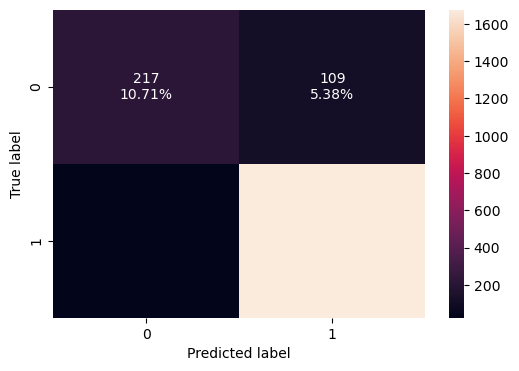

In [134]:
# creating confusion matrix
confusion_matrix_sklearn(randomForest_Tuned, X_val, y_val)

#### Tuning for Adaboost with original data

In [135]:
# defining the scorer variable
scorer = metrics.make_scorer(recall_score)

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/Users/jamessomerville/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/jamessomerville/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/jamessomerville/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/jamessomerville/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/jamessomerville/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` 

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9890176836190806:


In [136]:
# building model with best parameters
adaboost_Tuned = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)
# Fit the model on training data
adaboost_Tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100)

In [137]:
# Calculating different metrics on train set
adaboost_train = model_performance_classification_sklearn(
    adaboost_Tuned, X_train, y_train
)
print("Training performance:")
adaboost_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.987,0.994,0.991,0.992


In [138]:
# Calculating different metrics on validation set
adaboost_val = model_performance_classification_sklearn(adaboost_Tuned, X_val, y_val)
print("Validation performance:")
adaboost_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.964,0.991,0.967,0.979


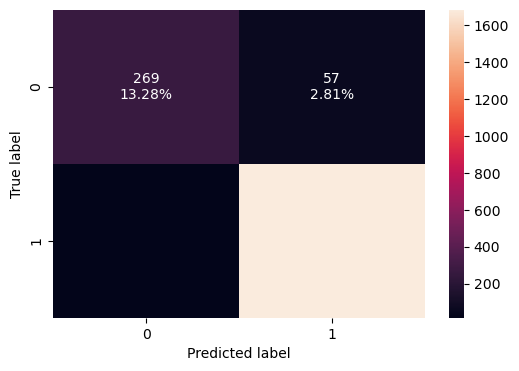

In [139]:
# creating confusion matrix
confusion_matrix_sklearn(adaboost_Tuned, X_val, y_val)

#### Tuning for Xgboost with original data

In [140]:
# defining the scorer variable
scorer = metrics.make_scorer(recall_score)

# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=1.0:


In [141]:
# building model with best parameters
xgboost_Tuned = XGBClassifier(
    subsample=0.7,
    scale_pos_weight=1,
    n_estimators=50,
    learning_rate=0.01,
    gamma=3
)
# Fit the model on training data
xgboost_Tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [142]:
# Calculating different metrics on train set
xgboost_train = model_performance_classification_sklearn(
    xgboost_Tuned, X_train, y_train
)
print("Training performance:")
xgboost_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.842,1.000,0.841,0.914


In [143]:
# Calculating different metrics on validation set
xgboost_val = model_performance_classification_sklearn(xgboost_Tuned, X_val, y_val)
print("Validation performance:")
xgboost_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.840,1.000,0.840,0.913


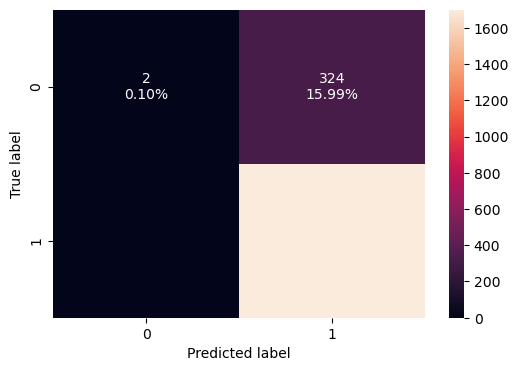

In [144]:
# creating confusion matrix
confusion_matrix_sklearn(xgboost_Tuned, X_val, y_val)

## Model Comparison and Final Model Selection

In [145]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        randomForest_train.T,
        adaboost_train.T,
        xgboost_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Tuned with Random search on original data",
    "Adaboost Tuned with Random on original data",
    "Xgboost Tuned with Random on original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest Tuned with Random search on original data,Adaboost Tuned with Random on original data,Xgboost Tuned with Random on original data
Accuracy,0.976,0.987,0.842
Recall,0.996,0.994,1.000
Precision,0.976,0.991,0.841
F1,0.986,0.992,0.914


In [146]:
# validation performance comparison
models_train_comp_df = pd.concat(
    [
        randomForest_val.T,
        adaboost_val.T,
        xgboost_val.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Tuned with Random search on original data",
    "Adaboost Tuned with Random on original data",
    "Xgboost Tuned with Random on original data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Random Forest Tuned with Random search on original data,Adaboost Tuned with Random on original data,Xgboost Tuned with Random on original data
Accuracy,0.934,0.964,0.840
Recall,0.986,0.991,1.000
Precision,0.939,0.967,0.840
F1,0.962,0.979,0.913


- The Xgboost tuned model gives a perfect recall score on training and validation data which indicates it is not over or under fitting and does a good job of minimizing false negatives as intended.
- Xgboost tuned model does well on F1 score of .91.
- Xgboost tuned model also scores in the mid-80s for Accuracy and Precision.

### Test set final performance

In [147]:
# Calculating different metrics on validation set
xgboost_test = model_performance_classification_sklearn(xgboost_Tuned, X_test, y_test)
print("Testing performance:")
xgboost_test

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.843,1.000,0.842,0.915


The Xgboost tuned model maintains its same high scores on test data, re-emphasizing its effectiveness.

### Feature Importance

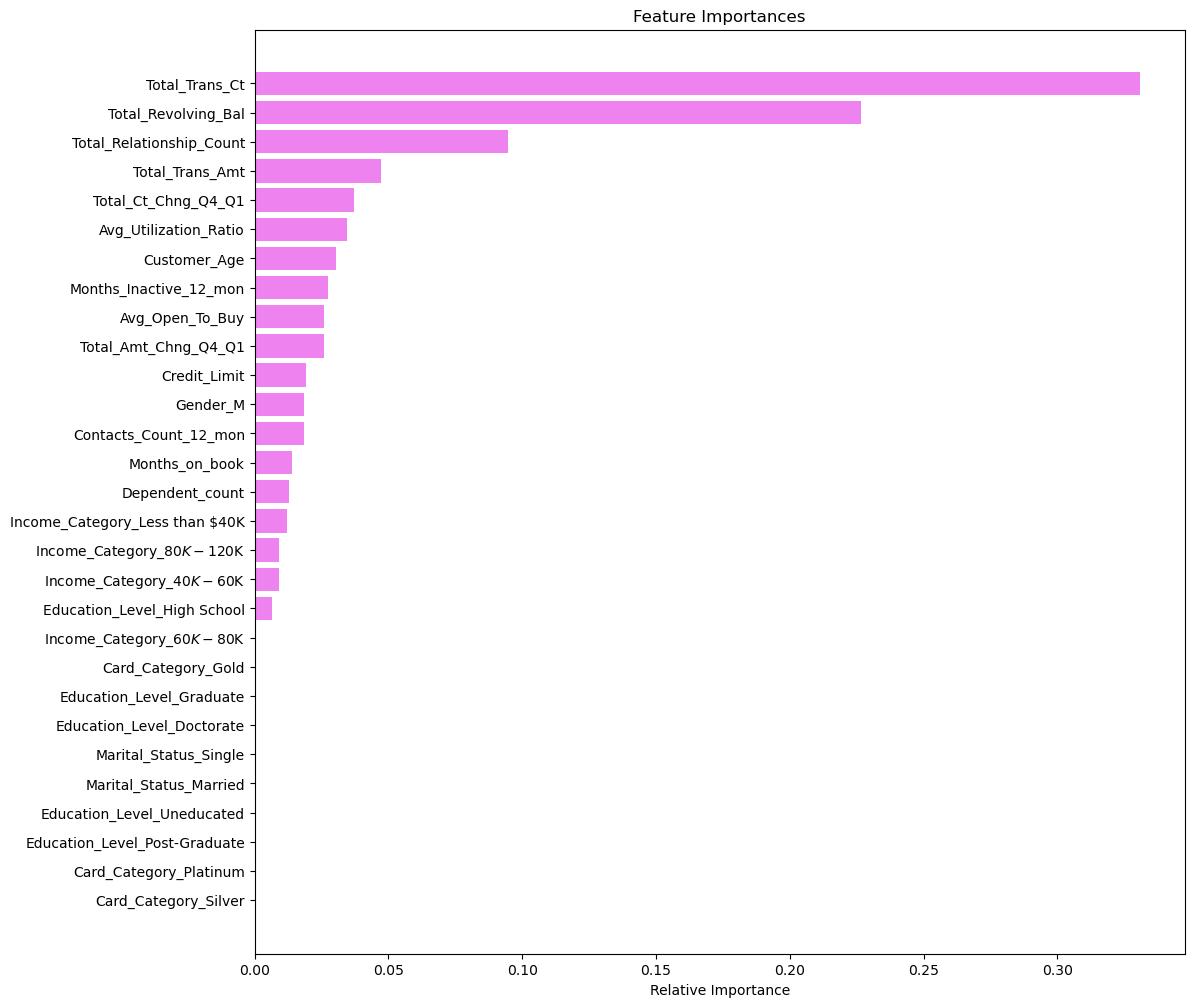

In [148]:
feature_names = X_train.columns
importances = xgboost_Tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Total transaction count and Total revolving balance account for the majority of feature importance in predicting if a customer will attrite.

## Business Insights and Conclusions

***

- A classification model was derived that is very accurate in predicting whether a customer will close their credit account.
- High activity and spending with their cards are the biggest predictors in determining if a customer will remain. A customer having additional products with the bank also helps retain them as credit card customers. These metrics are currently measured as follows:
   - Total_Trans_Ct: Total Transaction Count (Last 12 months)
   - Total_Revolving_Bal: Total Revolving Balance on the Credit Card
   - Total_Relationship_Count: Total no. of products held by the customer
- Regular monitoring of the above measures and trending drops in any of them will indicate a customer may close their credit account. In these cases proactive customer outreach, promotions, or advertising may be leveraged to help retain them.
- Many of the metrics are based on a previous year or quarter of data. Investigating if similar prediction results can be achieved with shorter time intervals may identify customers sooner - as a pattern playing out over the course of a year may be too late.